In [1]:
import numpy as np
import h5py

f = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/"
              +"processed/comparison/output/nexus,peaks,OSNK,0,10,1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE,FALSE,1/deeplift.imp_score.h5", "r")
nanog_profile_wn_hypimp = np.array(f["hyp_imp/Nanog/profile/wn"][:])
onehot_seq = np.array(f["inputs/seq"][:])
nanog_profile_wn_contribs = nanog_profile_wn_hypimp*onehot_seq

In [2]:
import modisco

track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)
grp = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/processed/comparison/output/nexus"
                +",peaks,OSNK,0,10,1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE,FALSE,1/deeplift"
                +"/Nanog/out/profile/wn/modisco.h5","r")
loaded_tfmodisco_results =\
    modisco.tfmodisco_workflow.workflow.TfModiscoResults.from_hdf5(grp, track_set=track_set)
grp.close()

TF-MoDISco is using the TensorFlow backend.


Display results

In [3]:
patterns = (loaded_tfmodisco_results
            .metacluster_idx_to_submetacluster_results["metacluster_0"]
            .seqlets_to_patterns_result.patterns)

pattern idx 0


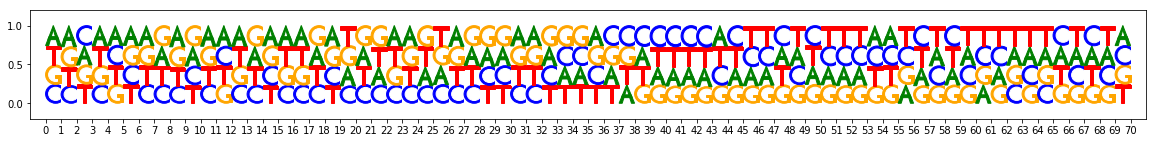

pattern idx 1


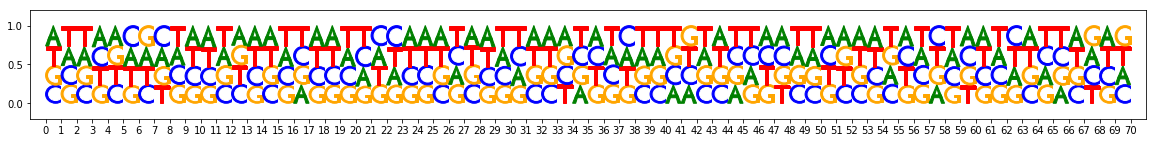

pattern idx 2


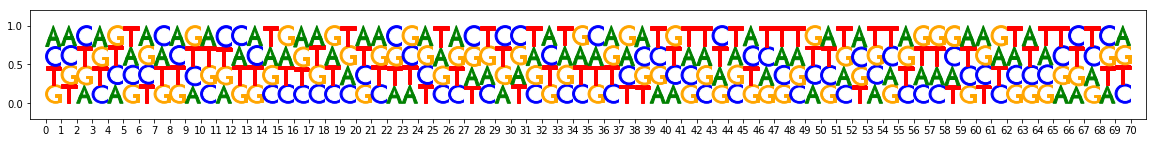

pattern idx 3


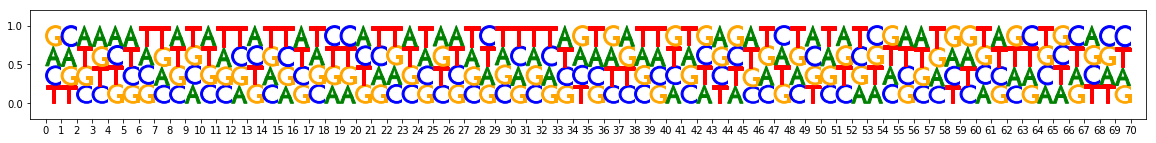

pattern idx 4


KeyboardInterrupt: 

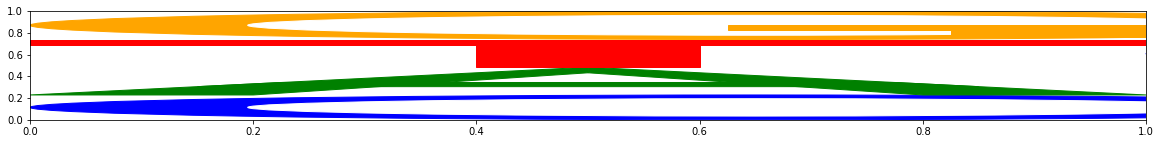

In [7]:
%matplotlib inline

from modisco.visualization import viz_sequence

for idx,pattern in enumerate(patterns):
    print("pattern idx",idx)
    viz_sequence.plot_weights(
        pattern["sequence"].fwd)